# Taller 05 Minimos Cuadrados
## Integrantes:
## - Christian Ayala
## - Jhonn Saeteros


## A) Interpole los puntos:
$p_1 = (5.4, 3.2)$<br>
$p2_i = (9.5, 0.7)$<br>
$p_3 = (12.3, -3.6)$<br>
## De estos, el punto $p2_i$ debe ser seleccionable y movible. Cree un programa que interpole una parabola en tiempo real para los tres puntos.

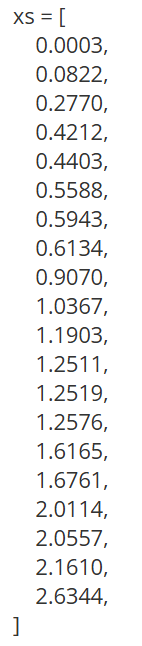
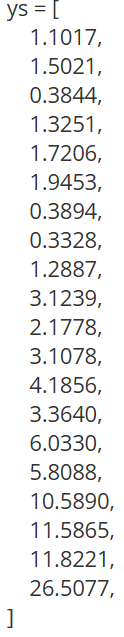